# Get region of interest 
- Visulize marker points from the dataset
- Rotate slot candidate
- Canny edge transform
- Get ROI from candidate slot

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Image dimensions: (600, 600, 3)


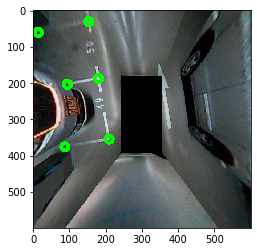

In [40]:
# read image
src = cv2.imread('img/20161019-1-1.bmp')
print('Image dimensions:', src.shape)

img = np.copy(src)
# marker point in slot 1
cv2.circle( img, (209, 355), 10, (0,255,0), 10)
cv2.circle( img, (87, 376), 10, (0,255,0), 10)

cv2.circle( img, (180, 188), 10, (0,255,0), 10)
cv2.circle( img, (94, 204), 10, (0,255,0), 10)

# marker point in slot 2
cv2.circle( img, (153, 31), 10, (0,255,0), 10)
cv2.circle( img, (14, 61), 10, (0,255,0), 10)

plt.imshow(img)

In [44]:
import numpy as np
# get slot angle and rotate
point1 =  [209, 355] 
point2 = [180, 188]
k = (point2[0]-point1[0])/(point2[1]-point1[1]) # slop
rad = np.arctan(k) # angle in rad
deg = np.degrees(rad) 
angle = 90 - deg
print('anlge to rotate:',deg)

anlge to rotate: 9.851327342808064


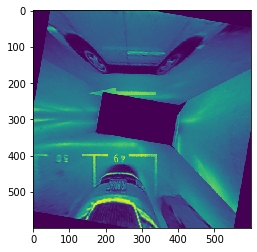

In [43]:
# rotation image
img_gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
img = np.copy(img_gray)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

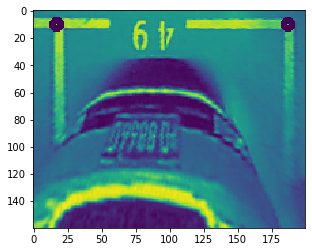

In [30]:
# crop a slot candidate

dst2 = dst[390:550,150:350]
dst3 = np.copy(dst2)

# plot marker point
cv2.circle( dst3, (17, 10), 3, (0,255,0), 3) 
cv2.circle( dst3, (187, 10), 3, (0,255,0), 3)

plt.imshow(dst3)
cv2.imwrite('slot_roi.bmp',dst2)

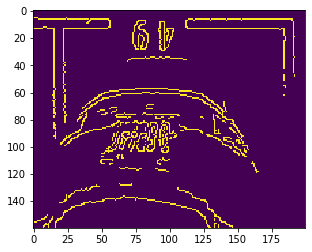

In [46]:
# Try Canny detector
gray = np.copy(dst2)
tight = cv2.Canny(gray, 200, 240)
 
    
# Display the images
cv2.imwrite('canny.bmp',tight)
plt.imshow(tight)

In [33]:
# apply a mask on the region of interest
def region_of_interest(img,vertices):
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 1
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [47]:
# apply a mask on the region of interest
def region_of_interest(img,vertices):
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 1
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

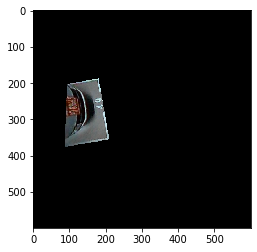

In [48]:
# Test if the region of interest works
img = np.copy(src) # load image
img_x = img.shape[1]
img_y = img.shape[0]


pt1 = [209, 355]
pt2 = [87, 376]
pt3 = [180, 188]
pt4 = [94, 204]

# select mask region
vertices = np.array([[(pt3[0],pt3[1]),(pt1[0],pt1[1] ),
                     (pt2[0],pt2[1]), (pt4[0],pt4[1])]], dtype=np.int32)

# test on color image
img_masked = region_of_interest(img,vertices)

# visualize
plt.imshow(img_masked)
